# Analysing and Visualising AirBnb Data  Using CRISP-DM

## Methodology

This analysis is going to follow the CRISP-DM methodology, cross-industry process for data mining. CRISP-DM is a robust and well known methodology that provides a structured approach to planning a data mining project. It includes the following processes:

1) business understanding <br>
2) data understanding <br>
3) prepare data <br>
4) data modelling <br>
5) evaluate the results <br>
6) deploy 

# Business Understanding

Airbnb, founded in 2008, is an online marketplace for arranging or offering lodging, primarily homestays, and tourism experiences. It is one of the world’s largest marketplaces for unique, authentic places to stay, offering over 7 million accommodations and 40,000 handcrafted activities, all powered by local hosts.
In this project we are going to analyse and find insights about the various interacting elements from the data and find solution to the following questions.<br>

#### 1) How does the listings  vary according to the bedroom size and the type of the property? 
#### 2) How is the interaction of host with their client affected based on their Acceptance rate, Response Rate and Response Time?
#### 3) What are the important features that estimates the price of a certain Property?

# Data Understanding

Importing  the needed packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import metrics
from sklearn import datasets
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import ensemble
warnings.filterwarnings('ignore')

C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Checking Working Directory


In [2]:
os.getcwd()
os.chdir('dataset')

## Reading datas and viewing its properties

In [3]:
calendar_data= pd.read_csv('calendar.csv')
listings_data= pd.read_csv('listings.csv')
reviews_data=pd.read_csv('reviews.csv')

In [4]:
calendar_data.shape
#listings_data.shape
#len(reviews_data)

(1393570, 4)

In [5]:
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [7]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


---

# Q1  How does the listings  vary according to the bedroom size and the type of the property?



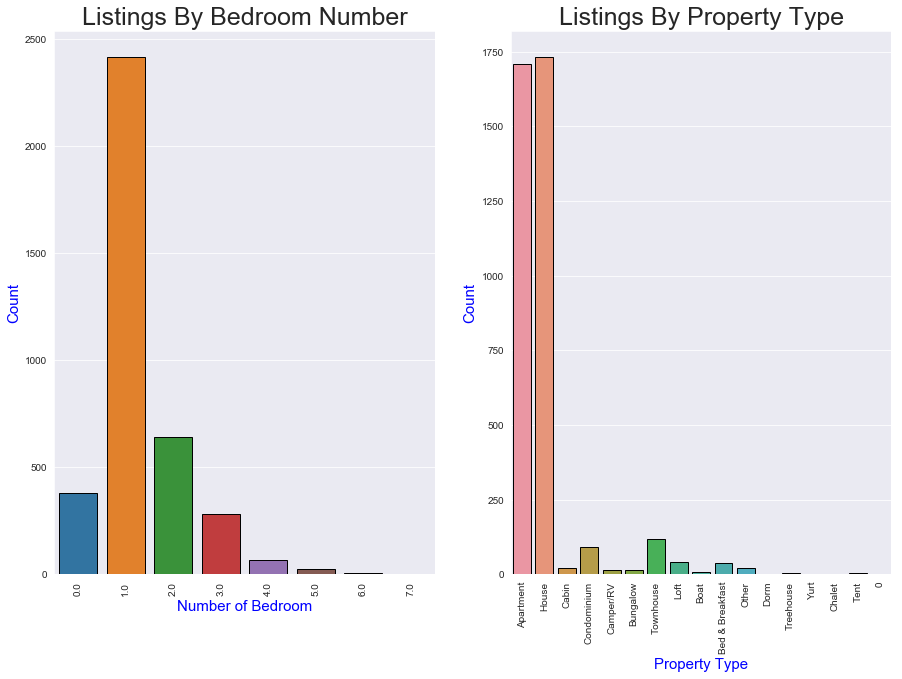

In [8]:
# Setting style for the figure
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,10)

fig,axes= plt.subplots(1,2) #Creating subplot for better displaying the figure

#creating a working data frame and cleaning the null values
listings_by_property_and_bedroom =listings_data[['bedrooms','property_type']]
listings_by_property_and_bedroom=listings_by_property_and_bedroom.fillna(0)

# Creating countplot and storing it in the appropriate subplots
chart1=sns.countplot(data=listings_by_property_and_bedroom,x='bedrooms',edgecolor='black',ax=axes[0]);
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart1.set_xlabel('Number of Bedroom',fontsize=15,color='Blue')
chart1.set_ylabel('Count',fontsize=15,color='Blue')
axes[0].set_title('Listings By Bedroom Number',fontsize=25)

chart2=sns.countplot(data=listings_by_property_and_bedroom,x='property_type',edgecolor='black',ax=axes[1]);
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
chart2.set_xlabel('Property Type',fontsize=15,color='Blue')
chart2.set_ylabel('Count',fontsize=15,color='Blue')
axes[1].set_title('Listings By Property Type',fontsize=25)

plt.show()

We can see that the listings are maximum with 1 bedroom option, that is nearly 2500 and the listings type consists of Apartments and Houses in majority cases 


---

# Q2 How is the interaction of host with their client affected based on their Acceptance rate, Response Rate and Response Time?

In [9]:
# First generating the needed data frame from the main listing data
host_properties=listings_data[['host_name','host_acceptance_rate','host_response_time','host_response_rate']]

In [10]:
#Viewing the new dataframe
host_properties.head()

,host_name,host_acceptance_rate,host_response_time,host_response_rate
0,Maija,100%,within a few hours,96%
1,Andrea,100%,within an hour,98%
2,Jill,100%,within a few hours,67%
3,Emily,NaN,NaN,NaN
4,Emily,NaN,within an hour,100%


#### We can see that there are rows with the host response rate, response time and acceptance rate consisiting of NAN values, In this case it is better to drop the rows that consists of all the Nan values in the row than imputing the values because, for a given host we cannot successfully predict all their required rates and that might lead to distort the obtained results

In [11]:
host_properties=host_properties.dropna(axis=0,how='all',subset=['host_acceptance_rate','host_response_time','host_response_rate'])


In [12]:
host_properties.shape

(3313, 4)

In [13]:
print(host_properties.host_response_time.value_counts())
print(host_properties.host_response_rate.value_counts())
print(host_properties.host_acceptance_rate.value_counts())

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64
100%    2371
90%      165
80%      104
99%       78
88%       66
50%       52
94%       46
67%       41
89%       32
75%       32
86%       30
98%       28
96%       28
70%       25
97%       21
60%       20
83%       20
92%       18
93%       18
33%       14
40%       12
63%       11
71%        8
95%        8
78%        8
91%        5
43%        4
25%        3
76%        3
87%        3
64%        3
57%        2
58%        2
82%        2
17%        2
55%        1
81%        1
53%        1
68%        1
30%        1
56%        1
38%        1
69%        1
65%        1
31%        1
Name: host_response_rate, dtype: int64
100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64


#### In the original listings data, we had 3818 entries, after removing the rows with all NAN values, we  end up with 3313 entries, which is around 500 data with Nan values entirely.
#### As we can see the above value counts for each columns, there are many columns that still consists of Nan values, which is around 100-300 entries. If we drop all the entries from that list too, we might not obtain a better  results. So, we can impute the values to fill the na values in the above dataframe which was obtained by removing all the rows consisting of all Nan values 
#### In this case it is better to fill the null values with mode, since the values are not quantitative but are categories

In [14]:
# Filling the mode values in missing entries
fill_mode= lambda col:col.fillna(col.mode()[0])
host_properties=host_properties.apply(fill_mode)


In [15]:
host_properties.head()


,host_name,host_acceptance_rate,host_response_time,host_response_rate
0,Maija,100%,within a few hours,96%
1,Andrea,100%,within an hour,98%
2,Jill,100%,within a few hours,67%
4,Emily,100%,within an hour,100%
6,Gary And Beth,100%,within an hour,100%


As we can see that the remaning data has been filled with mode values and the nan has been populated with the mode values

Lets now plot the newly refined data and view the interaction of the host to their customer requesting the accomodation

In [16]:
# Creating a function for easier access to cat plot
def cat_plot(df,axis=[],label=[],extra_parms=False):
    cat_plot1= sns.catplot(x=axis[0],kind='count',palette='ch:.25',data=df)
    cat_plot1.set_xlabels(label[0],fontsize=15,color='green')
    cat_plot1.set_ylabels('Count',fontsize=15,color='green')   
    if extra_parms==True:
        cat_plot1.fig.set_size_inches(15,15)
        cat_plot1.set_xticklabels(rotation=45)
    plt.show()
    

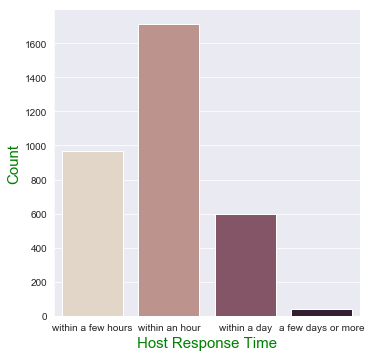

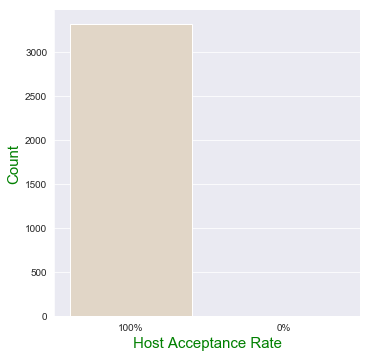

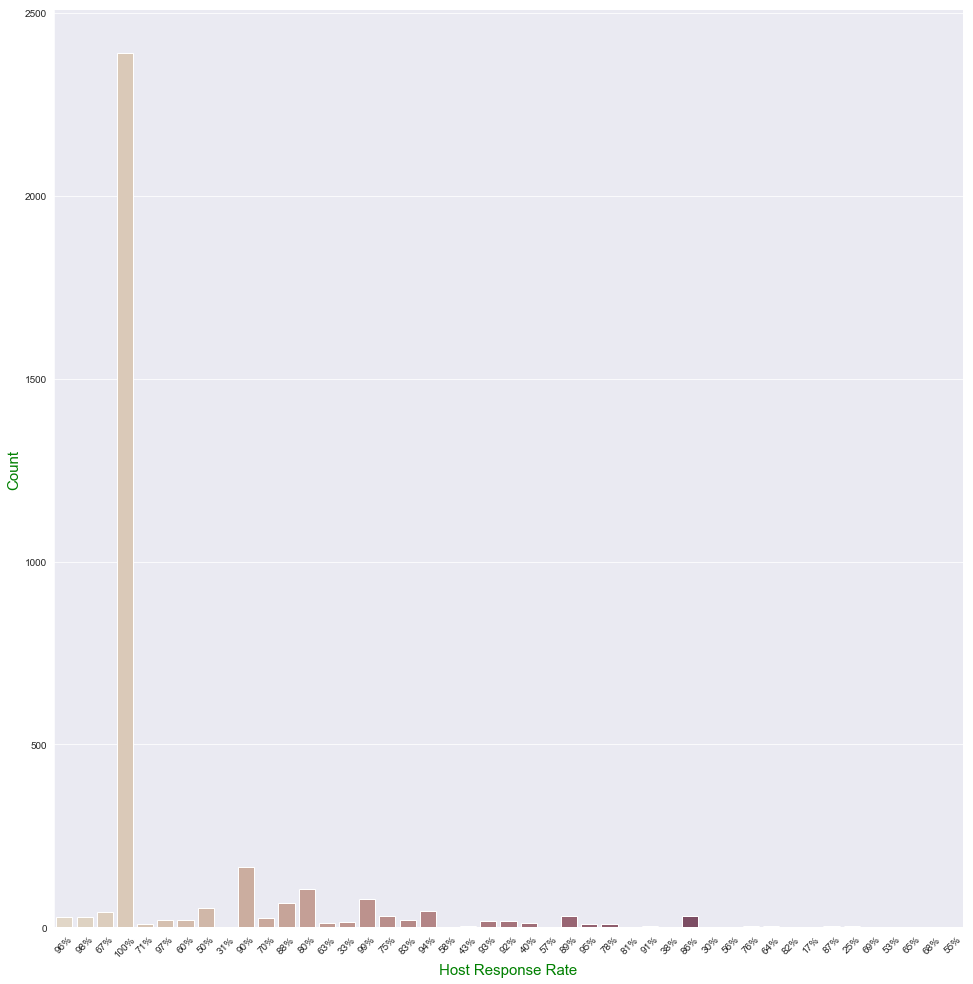

In [17]:
catplot1=cat_plot(host_properties,axis=['host_response_time'],label=['Host Response Time'])
catplot2=cat_plot(host_properties,axis=['host_acceptance_rate'],label=['Host Acceptance Rate'])
catplot3=cat_plot(host_properties,axis=['host_response_rate'],label=['Host Response Rate'],extra_parms=True)

#### We can see that the majority of host who has the listings of their property on aribnb are generally fast when responding to the request to provide accomodation.
#### The first and second chart shows that the majority of the hosts respond within an hour and their acceptance rate is 100%, which might be due to the data itself and the fact that we filled the NAN values with mode of the columns in the host_properties. We cannot do much about this than to trust that the people who are willing to put their property listings are generally positive about accepting the offer when their property has been selected by a customer.
#### From the third plot, we can see that the host response rate is also very high and the 100% rate is supported by around 2500 of the hosts, which is a nice thing and might be a reason for positive response that airbnb and the host get in general. 

---

---

# Q3 What are the important features that estimates the price of a certain Property?

 Lets create a new data comprising of the possible features that help in estimating the prices

In [18]:
data = listings_data[['price',
           'room_type',
           'accommodates',
           'bathrooms',
           'bedrooms',
           'beds',
           'review_scores_rating',
           'instant_bookable',
           'cancellation_policy',
           'amenities']]

Lets perform some cleaning and refining the data that we will use before fitting it into a linear model


In [19]:
# replacing NaN values with 0
data.fillna(0, inplace=True)

# extract the 'prices' from the table
price = data['price']
prices = []

# the values are stored as '$1' instead of 1.
# data cleaning to make the values into floats
for element in price:
    element = float(element[1:].replace(',',''))
    prices.append(element)

# replacing the current column into a new one for future use
data['price'] = prices

# excluding listings with "0" for price, bedrooms, etc
data = data[data.price > 0]
data = data[data.bedrooms > 0]
data = data[data.beds > 0]
data = data[data.review_scores_rating > 0]
data = data[data.accommodates > 0]
data = data[data.bathrooms > 0]

# first 5 of the data
data[0:5]

,price,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,instant_bookable,cancellation_policy,amenities
0,85.0,Entire home/apt,4,1.0,1.0,1.0,95.0,f,moderate,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,150.0,Entire home/apt,4,1.0,1.0,1.0,96.0,f,strict,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,975.0,Entire home/apt,11,4.5,5.0,7.0,97.0,f,strict,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
4,450.0,Entire home/apt,6,2.0,3.0,3.0,92.0,f,strict,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
5,120.0,Private room,2,1.0,1.0,1.0,95.0,f,strict,"{""Wireless Internet"",""Free Parking on Premises..."


In [20]:
# cancellation policy and instant bookable factors are little bit more complicated.
# we use pandas get_dummies function to convert the categorical variable into indicator variables

cancel_policy = pd.get_dummies(data.cancellation_policy).astype(int)
instant_booking = pd.get_dummies(data.instant_bookable, prefix = 'instant_booking').astype(int)
room_type = pd.get_dummies(data.room_type).astype(int)

# ib has 2 columns, so we can just drop one of them.
instant_booking = instant_booking.drop('instant_booking_f', axis = 1)

In [21]:
# we drop the original columns and replace them with indicator columns
data = data.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
data = pd.concat((data, cancel_policy, instant_booking, room_type), axis = 1)

In [22]:
# splitting the amenities list to draw out how many amenities each listing has

amenities_list = []

for element in data.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

data.amenities = amenities_list

In [23]:
data

,price,accommodates,bathrooms,bedrooms,beds,review_scores_rating,amenities,flexible,moderate,strict,instant_booking_t,Entire home/apt,Private room,Shared room
0,85.0,4,1.0,1.0,1.0,95.0,5,0,1,0,0,1,0,0
1,150.0,4,1.0,1.0,1.0,96.0,14,0,0,1,0,1,0,0
2,975.0,11,4.5,5.0,7.0,97.0,18,0,0,1,0,1,0,0
4,450.0,6,2.0,3.0,3.0,92.0,10,0,0,1,0,1,0,0
5,120.0,2,1.0,1.0,1.0,95.0,6,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,154.0,5,1.0,2.0,3.0,92.0,17,0,0,1,0,1,0,0
3811,65.0,3,1.0,1.0,1.0,100.0,9,0,1,0,0,1,0,0
3812,95.0,4,1.0,1.0,2.0,96.0,15,0,1,0,1,1,0,0
3813,359.0,6,2.0,3.0,3.0,80.0,11,0,0,1,0,1,0,0


## Lets Create a training and test data,  now that we have converted all the required values to numericalvalues

In [24]:
# splitting the training and test sets with a 70% and 30% size of original
split_data = data.drop(['price'], axis = 1)

train1, test1, train2, test2 = cross_validation.train_test_split(split_data,data.price, test_size=0.3,train_size = 0.7,random_state=13)

In [25]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train1, train2)
linear_reg_error = metrics.median_absolute_error(test2, linear_reg.predict(test1))

# ridge model testing
ridge = linear_model.Ridge()
ridge.fit(train1, train2)
ridge_error = metrics.median_absolute_error(test2, ridge.predict(test1))
print ("Linear Regression: " + str(linear_reg_error))
print ("Ridge: " + str(ridge_error))

Linear Regression: 24.165494920402182
Ridge: 24.113520583050672


It seems that both linear regression and ridge come out to be around $25 of error when predicting the prices. Let's see if we can lower this number by utilizing scikit learn's ensemble and GridSearchCV.

There are many estimators that can be used, like AdaBoost, GradientBoost and Bagging Regressor. In this case we will be using GradientBoost because it allows for optimization of arbitary differential loss functions by fitting a regression tree on the negative gradient.
Other estimators can also be used in this case, they each have their perks but we will work with the gradientboost regressor


In [26]:
#  Gradient Boost Regressor
param_names = ["n_estimators", "max_depth", "learning_rate", "loss", "min_samples_split"]
param_values = [[100,300,500], [1,2,3,4], [0.01, 0.02], ['ls', 'lad'], [2,2]]

parameters = dict(zip(param_names, param_values))
gbr = GridSearchCV(ensemble.GradientBoostingRegressor(), 
                   cv = 3, 
                   param_grid = parameters, 
                   scoring='median_absolute_error')
preds = gbr.fit(train1, train2)
gbr_best_estimator = gbr.best_estimator_
print("GradientBoostingRegressor: " + "$" + str(abs(gbr.best_score_)))

GradientBoostingRegressor: $21.026615193821193


We can see that the error has reduced to 20.99, which is just enough to work with. Now that we have adjusted the error we can move on to plotting the importance of features for the listings, which in turn will help to predict the prices of the property with much better accuracy and with less errors

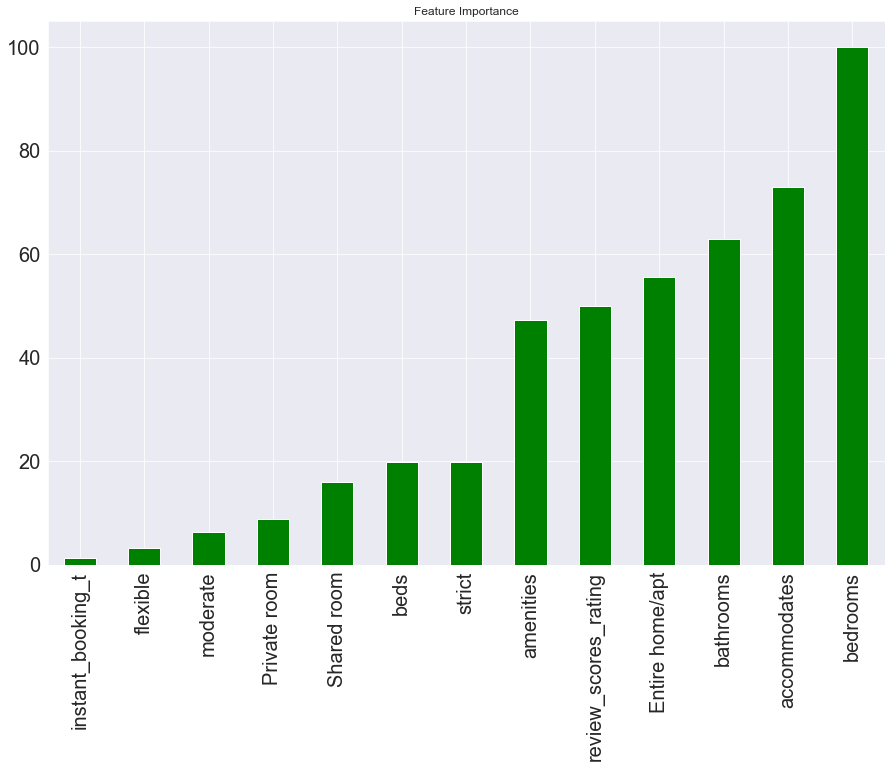

In [27]:
#Creating feature scores and plotting along the chart to visualise the important features
feature_importance = gbr_best_estimator.feature_importances_
feature_score = 100.0 * (feature_importance / feature_importance.max())

feature = pd.Series(feature_score, index = train1.columns).sort_values(ascending = True)
kwargs={'fontsize':20}
feature.plot(kind = 'bar',
              figsize = (15,10),
              color = 'Green',
              title='Feature Importance',
              **kwargs)

plt.show()            

We can see that the properties/ features that are most relevant to determining the price of the Owners property ranges from basic features like amenities and bedrooms to the review scores obtained. 
These features are essential to determine the prices for a new available listings according to the data we used.

# Conclusion

In this notebook, we loaded, cleaned, then explored airBnb data. We visualized the interaction between various elements and also built an estimator that helps to predict the prices of the property.

# Insights

1) We found out that the majority of the properties available at AirBnb consists of 1 Bedroom property and the Property Type is Apartment/ Houses in the majority cases. <br>
2) We found out that most hosts are quick to respond to the incoming customer request and are willing to provide accomodation to the customer as quick as possible, and majority of the responses are within an hour and the acceptance rate is 100% for any request made by the customer. This shows that the hosts are quick and positive to provide accomodation to the customers. <br>
3) We found out the importance scores for the potential feature that can help to estimate the prices of the property and that included Bedroom, Accomodation and Bathroom to be the top 3 features that the customers look for in their rentals.
